# main
- This notebook estimates the underlying stochastic volatility process
$$
\begin{align}
\underbrace{\log y_t}_{\text{Observed}} &= \rho_y \log y_{t-1} + \exp(\sigma_{t-1}) \epsilon_t \\
\underbrace{\sigma_t}_{\text{Unobserved}} &= (1-\rho_\sigma) \overline{\sigma} + \rho_{\sigma} \sigma_{t-1} + \sigma_\nu \nu_t \\
\epsilon_t &\sim \mathcal{N}(0, 1) \\
\nu_t &\sim \mathcal{N}(0, 1) 
\end{align} 
$$
- $y_t$ is the (observed) output component
- $\sigma_t$ is unobserved and determines the standard deviation of output innovations

In [14]:
import pandas as pd
import numpy as np
import pystan
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from stancode import code

In [15]:
df = pd.read_csv('../data/cleaned.csv')
df['time'] = pd.to_datetime(df['time'])
df

,y,time,logy,logy_cycle,logy_trend,logy_sa,y_sa,logy_sa_cycle,logy_sa_trend
0,4.888157e+09,1992-01-01,22.310081,0.006051,22.304030,NaN,NaN,NaN,NaN
1,4.786017e+09,1992-04-01,22.288964,-0.019388,22.308353,NaN,NaN,NaN,NaN
2,4.951040e+09,1992-07-01,22.322864,0.010185,22.312678,22.327817,4.975624e+09,NaN,NaN
3,5.215747e+09,1992-10-01,22.374948,0.057948,22.317000,22.326042,4.966802e+09,NaN,NaN
4,5.031079e+09,1993-01-01,22.338900,0.017586,22.321314,22.315183,4.913158e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...
105,7.520601e+09,2018-04-01,22.740912,0.022393,22.718519,22.735935,7.483266e+09,NaN,NaN
106,7.250831e+09,2018-07-01,22.704382,-0.007228,22.711610,22.704394,7.250916e+09,NaN,NaN
107,6.868398e+09,2018-10-01,22.650197,-0.054373,22.704570,22.679522,7.072800e+09,NaN,NaN
108,6.950654e+09,2019-01-01,22.662102,-0.035370,22.697472,NaN,NaN,NaN,NaN


In [16]:
datain = {
    'N':len(df), 
    'y':df.logy_cycle
}

In [ ]:
%%capture
sm = pystan.StanModel(model_code=code)

In [ ]:
fit = sm.sampling(datain, iter=1000, chains=1, seed=1)

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: normal_lpdf: Scale parameter is 0, but must be > 0!  (in 'unknown file name' at line 22)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.




Gradient evaluation took 8.5e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.85 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.968001 seconds (Warm-up)
               0.87144 seconds (Sampling)
               1.83944 seconds (Total)



In [ ]:
fit


For the full summary use 'print(fit)'

Inference for Stan model: anon_model_065fc8c9f275528b3d93856f9fd0e8eb.
1 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=500.

            mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
rho_y       0.69  3.9e-3   0.07   0.56   0.64   0.69   0.74   0.84    348    1.0
rho_sigma   0.88    0.01   0.09   0.65   0.82    0.9   0.95   0.99     77   1.04
sigma_bar  -3.34    0.01   0.19  -3.76  -3.43  -3.35  -3.26  -2.92    252    1.0
sigma_nu    0.11  7.4e-3   0.03   0.05   0.08    0.1   0.12    0.2     22    1.1
sigma[1]    -3.3    0.01   0.24  -3.87  -3.42   -3.3  -3.16  -2.82    269    1.0
sigma[2]   -3.29    0.02   0.22  -3.73  -3.42   -3.3  -3.16  -2.85    206   1.01
sigma[3]   -3.27    0.02   0.21  -3.74   -3.4  -3.27  -3.13  -2.89    179   1.01
sigma[4]   -3.25    0.01    0.2  -3.68  -3.38  -3.26  -3.13  -2.87    226    1.0
sigma[5]   -3.25    0.01   0.19  -3.63  -3.37

In [ ]:
posterior = fit.to_dataframe()
posterior

,chain,draw,warmup,rho_y,rho_sigma,sigma_bar,sigma_nu,sigma[1],sigma[2],sigma[3],...,sigma[108],sigma[109],sigma[110],lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__
0,0,0,0,0.652309,0.997994,-2.959903,0.073689,-3.966414,-3.740512,-3.718334,...,-3.838008,-3.772365,-3.730606,513.879351,0.799544,0.073598,7.0,255.0,0.0,-463.266462
1,0,1,0,0.703071,0.996471,-2.912569,0.076980,-3.996030,-3.747808,-3.813985,...,-3.817152,-3.822649,-3.789941,517.231636,0.997173,0.073598,6.0,63.0,0.0,-450.661393
2,0,2,0,0.767184,0.890114,-3.288399,0.079608,-3.309141,-3.416533,-3.442242,...,-3.533211,-3.520683,-3.504526,520.105280,0.954462,0.073598,7.0,127.0,0.0,-461.317764
3,0,3,0,0.676797,0.737514,-3.321467,0.081770,-3.483028,-3.400143,-3.409429,...,-3.407191,-3.375289,-3.227115,517.038519,0.887414,0.073598,7.0,127.0,0.0,-454.371861
4,0,4,0,0.863665,0.835462,-3.342096,0.089887,-3.356861,-3.341969,-3.358026,...,-3.578038,-3.518479,-3.429345,507.663100,0.924942,0.073598,7.0,127.0,0.0,-453.924153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0,495,0,0.701797,0.914503,-3.256611,0.043809,-3.230513,-3.167382,-3.192705,...,-3.357830,-3.376869,-3.377950,590.818931,0.884929,0.073598,6.0,127.0,0.0,-522.941718
496,0,496,0,0.778199,0.980532,-3.309599,0.047159,-3.255335,-3.240253,-3.169558,...,-3.159059,-3.200931,-3.243182,577.134261,0.733088,0.073598,5.0,31.0,0.0,-525.647645
497,0,497,0,0.742601,0.896536,-3.318735,0.043143,-3.256223,-3.242702,-3.224410,...,-3.129083,-3.099097,-3.142385,591.991587,0.991264,0.073598,7.0,255.0,0.0,-533.932270
498,0,498,0,0.731045,0.872421,-3.355346,0.043168,-3.418069,-3.340665,-3.347947,...,-3.304790,-3.357228,-3.413468,587.133718,0.964798,0.073598,6.0,127.0,0.0,-546.374814


In [ ]:
params = posterior[['rho_y', 'rho_sigma', 'sigma_bar', 'sigma_nu']]
params

,rho_y,rho_sigma,sigma_bar,sigma_nu
0,0.652309,0.997994,-2.959903,0.073689
1,0.703071,0.996471,-2.912569,0.076980
2,0.767184,0.890114,-3.288399,0.079608
3,0.676797,0.737514,-3.321467,0.081770
4,0.863665,0.835462,-3.342096,0.089887
...,...,...,...,...
495,0.701797,0.914503,-3.256611,0.043809
496,0.778199,0.980532,-3.309599,0.047159
497,0.742601,0.896536,-3.318735,0.043143
498,0.731045,0.872421,-3.355346,0.043168


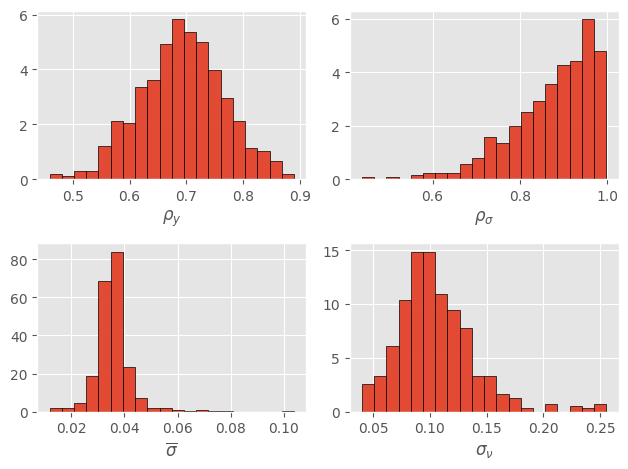

In [ ]:
plt.subplot(221)
plt.hist(params['rho_y'], edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\rho_y$')

plt.subplot(222)
plt.hist(params['rho_sigma'], edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\rho_\sigma$')

plt.subplot(223)
plt.hist(np.exp(params['sigma_bar']), edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\overline{\sigma}$')

plt.subplot(224)
plt.hist(params['sigma_nu'], edgecolor='black', density=True, bins=20)
plt.xlabel(r'$\sigma_\nu$')

plt.tight_layout()

plt.savefig('../fig/argentina_posterior.png', bbox_inches='tight')

In [ ]:
# posterior draws of sigma[t] for each time period t
focus = [x for x in posterior.columns if '[' in x]
sigma = posterior[focus].transform(np.exp)
sigma

,sigma[1],sigma[2],sigma[3],sigma[4],sigma[5],sigma[6],sigma[7],sigma[8],sigma[9],sigma[10],...,sigma[101],sigma[102],sigma[103],sigma[104],sigma[105],sigma[106],sigma[107],sigma[108],sigma[109],sigma[110]
0,0.018941,0.023742,0.024274,0.024131,0.029464,0.032087,0.035178,0.031838,0.035254,0.032530,...,0.028321,0.025164,0.024962,0.025235,0.023842,0.022176,0.024296,0.021536,0.022998,0.023978
1,0.018388,0.023569,0.022060,0.023821,0.026529,0.030065,0.031145,0.034115,0.038234,0.034152,...,0.026351,0.024861,0.025459,0.023706,0.023693,0.022322,0.022465,0.021990,0.021870,0.022597
2,0.036548,0.032826,0.031993,0.032189,0.025814,0.026048,0.024304,0.022758,0.026093,0.028196,...,0.029036,0.029418,0.027080,0.029673,0.028486,0.028387,0.027815,0.029211,0.029579,0.030061
3,0.030714,0.033369,0.033060,0.035643,0.046290,0.042963,0.040579,0.041841,0.034473,0.034002,...,0.028216,0.030475,0.030861,0.034660,0.032905,0.033787,0.034590,0.033134,0.034208,0.039672
4,0.034844,0.035367,0.034804,0.038502,0.039222,0.036755,0.039789,0.035098,0.033772,0.034640,...,0.029846,0.035176,0.031253,0.034979,0.035426,0.035471,0.035900,0.027930,0.029644,0.032408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.039537,0.042114,0.041061,0.042247,0.040097,0.040382,0.041431,0.040796,0.040767,0.041623,...,0.045767,0.044420,0.041713,0.037438,0.036571,0.034557,0.035828,0.034811,0.034154,0.034117
496,0.038568,0.039154,0.042022,0.039210,0.039058,0.039909,0.043029,0.044720,0.042967,0.042762,...,0.035400,0.035834,0.035649,0.038057,0.039537,0.042731,0.043044,0.042466,0.040724,0.039039
497,0.038534,0.039058,0.039779,0.038443,0.036977,0.038999,0.039017,0.035381,0.034458,0.031384,...,0.035721,0.037640,0.037987,0.037248,0.038401,0.039747,0.042549,0.043758,0.045090,0.043180
498,0.032776,0.035413,0.035156,0.034072,0.031707,0.031877,0.033301,0.034859,0.033317,0.036752,...,0.042764,0.041693,0.037865,0.036482,0.037035,0.037336,0.036583,0.036707,0.034832,0.032927


In [ ]:
# compute quantiles at each point t along the 0 axis
q20 = np.quantile(sigma, 0.20, axis=0)
q80 = np.quantile(sigma, 0.80, axis=0)
qmean = np.mean(sigma.values, axis=0)

In [ ]:
# collect mean and confidence intervals into dataframe
sigma_ts = pd.DataFrame({'time':df.time})
sigma_ts['qmean'] = qmean
sigma_ts['q20'] = q20
sigma_ts['q80'] = q80
sigma_ts

,time,qmean,q20,q80
0,1992-01-01,0.038056,0.031268,0.044054
1,1992-04-01,0.038023,0.031809,0.043747
2,1992-07-01,0.038742,0.032308,0.044678
3,1992-10-01,0.039414,0.033100,0.045260
4,1993-01-01,0.039629,0.033465,0.045597
...,...,...,...,...
105,2018-04-01,0.031854,0.026131,0.036739
106,2018-07-01,0.032322,0.027150,0.037201
107,2018-10-01,0.032824,0.027302,0.037966
108,2019-01-01,0.032399,0.026612,0.037722


/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_3788/582003518.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
/var/folders/_2/m9bwbkc51wl1nrm6h52gx_300000gn/T/ipykernel_3788/582003518.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)


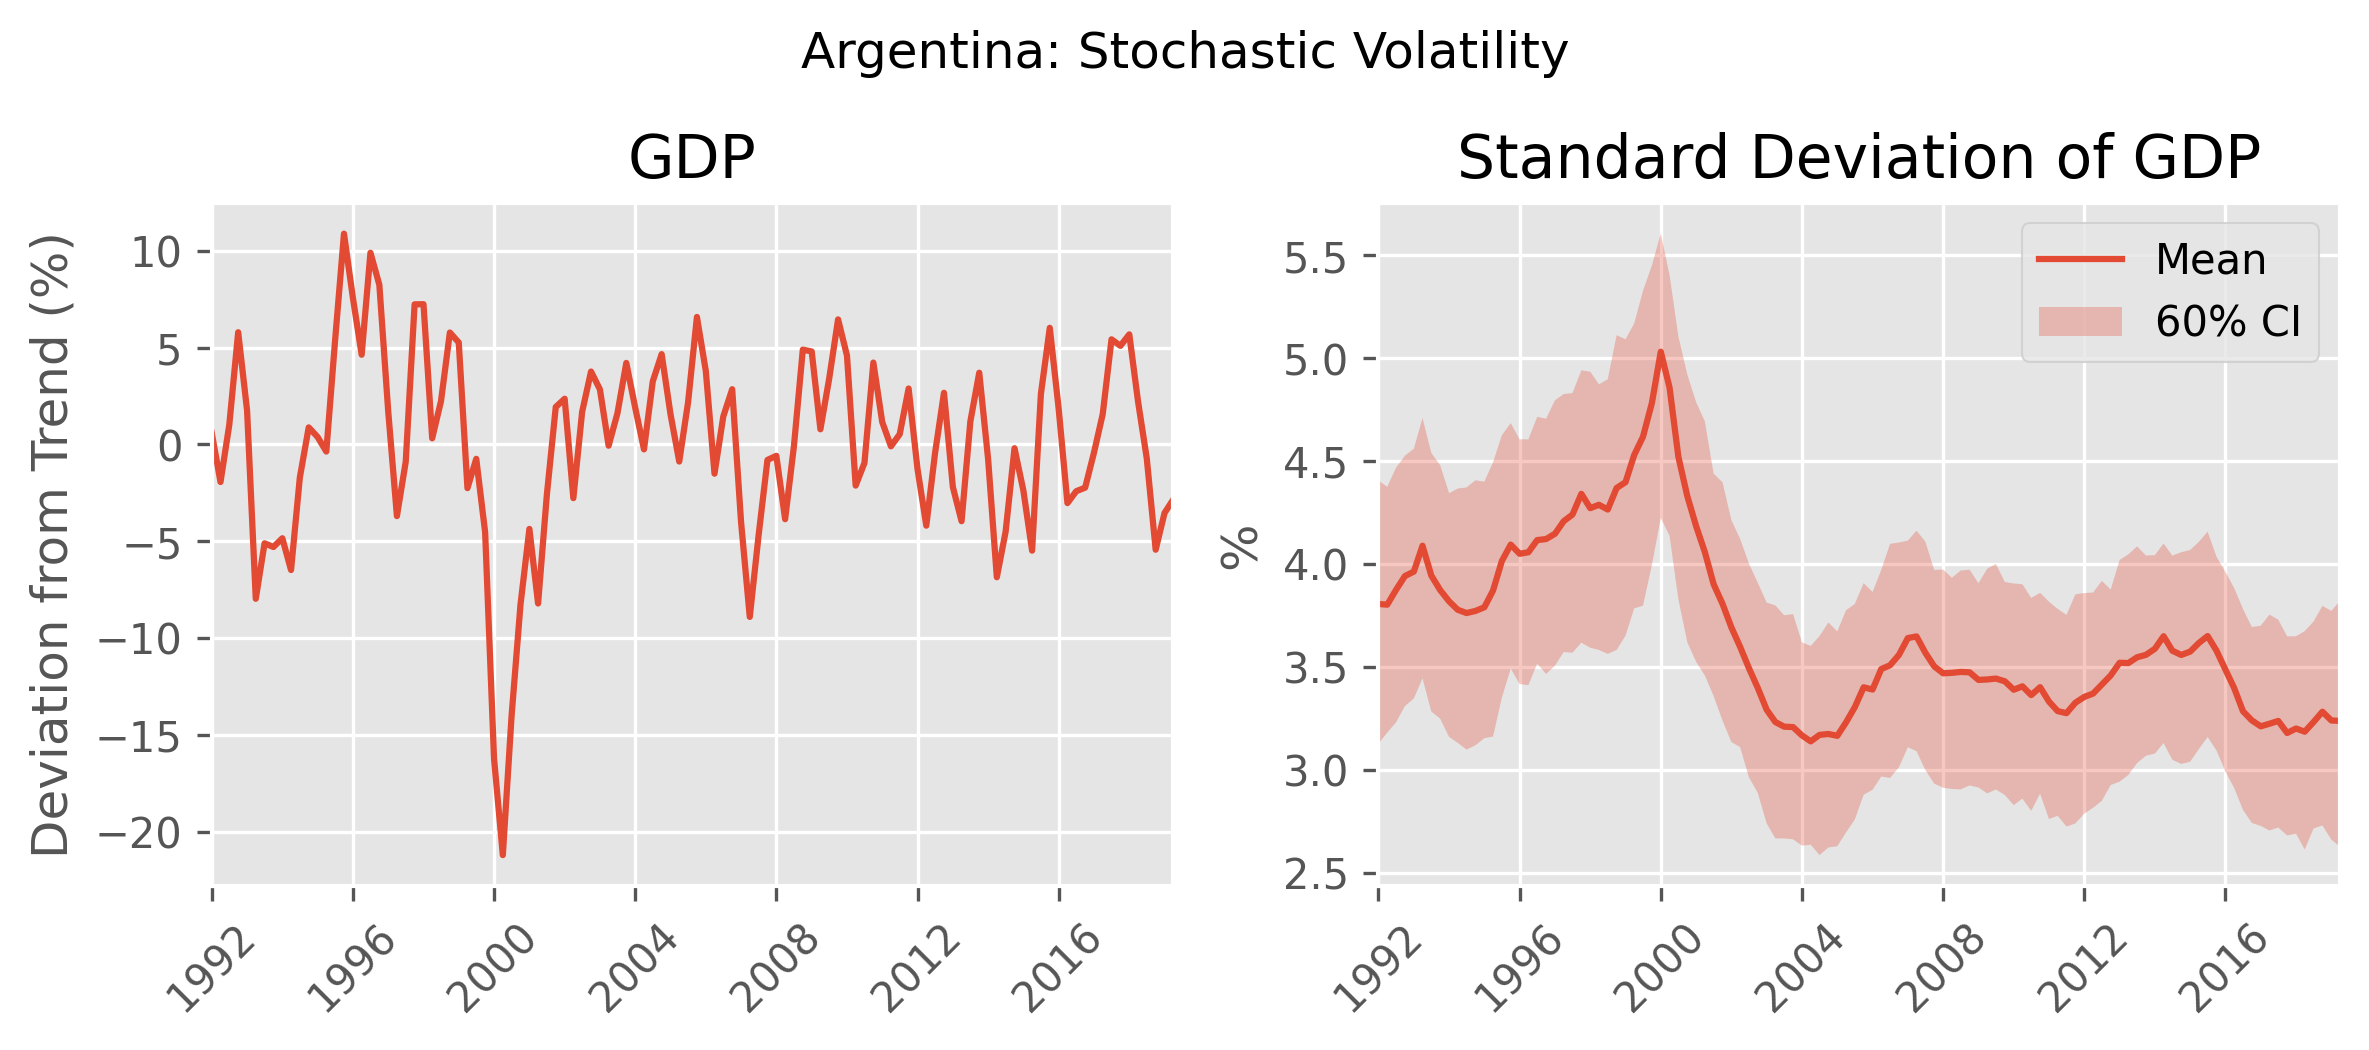

In [ ]:
import matplotlib.dates as mdates
fig = plt.figure(figsize=(8, 6), dpi=300)

fig.suptitle('Argentina: Stochastic Volatility')

ax = plt.subplot(221)
ax.plot(df.time, 100*df.logy_cycle)
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_ylabel('Deviation from Trend (%)')
ax.set_title('GDP')
plt.margins(x=0)

ax = plt.subplot(222)
ax.plot(sigma_ts.time, 100*sigma_ts.qmean, label='Mean')
ax.fill_between(sigma_ts.time, 100*sigma_ts.q20, 100*sigma_ts.q80, alpha=0.3, 
                label='60% CI')
ax.set_xticklabels(labels=ax.get_xticks(), rotation=45)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_title('Standard Deviation of GDP')
ax.set_ylabel('%')
plt.margins(x=0)
ax.legend()

plt.tight_layout()

plt.savefig('../fig/argentina_stochastic_volatility.png', 
            bbox_inches='tight')